## 1. 데이터 긁어오기

In [1]:
import urllib
import time
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from selenium import webdriver
from html_table_parser import parser_functions
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 긁어 올 연도 설정
years_old = [year for year in range(1983, 1989)]
years_recent = [year for year in range(2015, 2021)]

### 1.1 1980년대 투수 정보 긁어오기

In [11]:
# 1980년대 데이터 프레임 만들어주기
old_raw = pd.DataFrame()

In [12]:
# kbo 예전 투수기록 페이지 열기
driver = webdriver.Chrome("../../driver/chromedriver.exe")
url = 'https://www.koreabaseball.com/Record/Player/PitcherBasic/BasicOld.aspx'
driver.get(url)

In [13]:
# 연도마다 for문 돌리기
for year in tqdm_notebook(years_old):
    element = driver.find_element_by_id("cphContents_cphContents_cphContents_ddlSeason_ddlSeason")
    element.send_keys(year)
    time.sleep(1)

    # 각 연도마다 팀명 불러오기
    team_raw = driver.find_element_by_id("cphContents_cphContents_cphContents_ddlTeam_ddlTeam") # 부모 태그
    team_list = team_raw.find_elements_by_tag_name("option") #자식 태그


    team_names = [option.get_attribute("text") for option in team_list]
    team_names = team_names[1:]
    
    # 각 팀마다 크롤링 시작
    for team in team_names:
        element = driver.find_element_by_id("cphContents_cphContents_cphContents_ddlTeam_ddlTeam")
        element.send_keys(team)
        driver.implicitly_wait(2)
        
        # 해당 팀 페이지 html 긁어오기
        page_source = driver.page_source
        page = BeautifulSoup(page_source, 'html.parser')
        table = page.find("table")
        tmp = parser_functions.make2d(table)

        df_tmp = pd.DataFrame(data = tmp[1:], columns=tmp[0])
        df_tmp['year'] = year

        old_raw = pd.concat([old_raw, df_tmp], ignore_index=True)
    
        print(year, team)
        time.sleep(1)

  0%|          | 0/6 [00:00<?, ?it/s]

1983 롯데
1983 삼미
1983 삼성
1983 해태
1983 MBC
1983 OB
1984 롯데
1984 삼미
1984 삼성
1984 해태
1984 MBC
1984 OB
1985 롯데
1985 삼성
1985 청보
1985 해태
1985 MBC
1985 OB
1986 롯데
1986 빙그레
1986 삼성
1986 청보
1986 해태
1986 MBC
1986 OB
1987 롯데
1987 빙그레
1987 삼성
1987 청보
1987 해태
1987 MBC
1987 OB
1988 롯데
1988 빙그레
1988 삼성
1988 태평양
1988 해태
1988 MBC
1988 OB


In [14]:
# 중복 데이터 확인
duplicates = old_raw.duplicated()
duplicates.value_counts()

False    465
True       1
dtype: int64

In [15]:
old_raw = old_raw.drop_duplicates(keep = 'first').reset_index(drop=True)

In [16]:
old_raw.to_csv('./old_raw_2.csv', encoding='utf-8-sig', index=False)

In [17]:
driver.close()

In [20]:
old_raw.columns

Index(['순위', '선수명', '팀명', 'ERA', 'G', 'CG', 'SHO', 'W', 'L', 'SV', 'HLD',
       'WPCT', 'TBF', 'IP', 'H', 'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'year'],
      dtype='object')

### 1.2 2015-2020 투수 데이터 긁어오기

In [21]:
# 기본정보 1
recent1_df = pd.DataFrame()

In [22]:
# kbo 기본정보1 투수 페이지 열기
driver = webdriver.Chrome("../../driver/chromedriver.exe")
url = 'https://www.koreabaseball.com/Record/Player/PitcherBasic/Basic1.aspx'
driver.get(url)

In [23]:
# 연도마다 for문 돌리기
for year in tqdm_notebook(years_recent):
    element = driver.find_element_by_id("cphContents_cphContents_cphContents_ddlSeason_ddlSeason")
    element.send_keys(year)
    time.sleep(1)

    # 각 연도마다 팀명 불러오기
    team_raw = driver.find_element_by_id("cphContents_cphContents_cphContents_ddlTeam_ddlTeam") # 부모 태그
    team_list = team_raw.find_elements_by_tag_name("option") #자식 태그

    team_names = [option.get_attribute("text") for option in team_list]
    team_names = team_names[1:]
    
    # 각 팀마다 크롤링 시작
    for team in team_names:
        element = driver.find_element_by_id("cphContents_cphContents_cphContents_ddlTeam_ddlTeam")
        element.send_keys(team)
        driver.implicitly_wait(2)
        
        # 해당 팀 페이지 html 긁어오기
        page_source = driver.page_source
        page = BeautifulSoup(page_source, 'html.parser')
        table = page.find("table")
        tmp = parser_functions.make2d(table)

        df_tmp = pd.DataFrame(data = tmp[1:], columns=tmp[0])
        df_tmp['year'] = year

        recent1_df = pd.concat([recent1_df, df_tmp], ignore_index=True)
    
        print(year, team)
        time.sleep(1)

  0%|          | 0/6 [00:00<?, ?it/s]

2015 넥센
2015 두산
2015 롯데
2015 삼성
2015 한화
2015 KIA
2015 KT
2015 LG
2015 NC
2015 SK
2016 넥센
2016 두산
2016 롯데
2016 삼성
2016 한화
2016 KIA
2016 KT
2016 LG
2016 NC
2016 SK
2017 넥센
2017 두산
2017 롯데
2017 삼성
2017 한화
2017 KIA
2017 KT
2017 LG
2017 NC
2017 SK
2018 넥센
2018 두산
2018 롯데
2018 삼성
2018 한화
2018 KIA
2018 KT
2018 LG
2018 NC
2018 SK
2019 두산
2019 롯데
2019 삼성
2019 키움
2019 한화
2019 KIA
2019 KT
2019 LG
2019 NC
2019 SK
2020 두산
2020 롯데
2020 삼성
2020 키움
2020 한화
2020 KIA
2020 KT
2020 LG
2020 NC
2020 SK


In [24]:
driver.close()

In [25]:
# 세부정보 2
recent2_df = pd.DataFrame()

In [26]:
# kbo 세부기록2 투수 페이지 열기
driver = webdriver.Chrome("../../driver/chromedriver.exe")
url = 'https://www.koreabaseball.com/Record/Player/PitcherBasic/Basic2.aspx'
driver.get(url)

In [27]:
# 연도마다 for문 돌리기
for year in tqdm_notebook(years_recent):
    element = driver.find_element_by_id("cphContents_cphContents_cphContents_ddlSeason_ddlSeason")
    element.send_keys(year)
    time.sleep(1)

    # 각 연도마다 팀명 불러오기
    team_raw = driver.find_element_by_id("cphContents_cphContents_cphContents_ddlTeam_ddlTeam") # 부모 태그
    team_list = team_raw.find_elements_by_tag_name("option") #자식 태그

    team_names = [option.get_attribute("text") for option in team_list]
    team_names = team_names[1:]
    
    # 각 팀마다 크롤링 시작
    for team in team_names:
        element = driver.find_element_by_id("cphContents_cphContents_cphContents_ddlTeam_ddlTeam")
        element.send_keys(team)
        driver.implicitly_wait(2)
        
        # 해당 팀 페이지 html 긁어오기
        page_source = driver.page_source
        page = BeautifulSoup(page_source, 'html.parser')
        table = page.find("table")
        tmp = parser_functions.make2d(table)

        df_tmp = pd.DataFrame(data = tmp[1:], columns=tmp[0])
        df_tmp['year'] = year

        recent2_df = pd.concat([recent2_df, df_tmp], ignore_index=True)
    
        print(year, team)
        time.sleep(1)

  0%|          | 0/6 [00:00<?, ?it/s]

2015 넥센
2015 두산
2015 롯데
2015 삼성
2015 한화
2015 KIA
2015 KT
2015 LG
2015 NC
2015 SK
2016 넥센
2016 두산
2016 롯데
2016 삼성
2016 한화
2016 KIA
2016 KT
2016 LG
2016 NC
2016 SK
2017 넥센
2017 두산
2017 롯데
2017 삼성
2017 한화
2017 KIA
2017 KT
2017 LG
2017 NC
2017 SK
2018 넥센
2018 두산
2018 롯데
2018 삼성
2018 한화
2018 KIA
2018 KT
2018 LG
2018 NC
2018 SK
2019 두산
2019 롯데
2019 삼성
2019 키움
2019 한화
2019 KIA
2019 KT
2019 LG
2019 NC
2019 SK
2020 두산
2020 롯데
2020 삼성
2020 키움
2020 한화
2020 KIA
2020 KT
2020 LG
2020 NC
2020 SK


In [35]:
driver.close()

In [28]:
# 중복 데이터 확인
duplicates = recent1_df.duplicated()
duplicates.value_counts()

False    1528
dtype: int64

In [29]:
# 중복 데이터 확인
duplicates = recent2_df.duplicated()
duplicates.value_counts()

False    1528
dtype: int64

In [30]:
baseball_df = pd.merge(recent1_df, recent2_df, how='left', left_on=['순위', '선수명', '팀명', 'ERA', 'year'], right_on=['순위', '선수명', '팀명', 'ERA', 'year'])

In [31]:
baseball_df.to_csv('./recent_raw_2.csv', encoding='utf-8-sig', index=False)

### 1.3 2015-2020 연봉 데이터 긁어오기

In [32]:
# STATIZ에서 연봉 데이터 url 만들기

def get_url(year, team):
    url_base = 'http://www.statiz.co.kr/salary.php?opt=0&sopt='
    year = str(year)
    url_plus = '&cnv=&pos=&te='
    team = str(team)

    return url_base + year + url_plus + team

In [33]:
salary_df = pd.DataFrame()

In [34]:
# 연도마다 for문 돌리기 - recent
for year in tqdm_notebook(years_recent):
    for team in range(1, 13):
        url = get_url(year, team)
        time.sleep(1)
        
        response = urllib.request.urlopen(url)
        page = BeautifulSoup(response, 'html.parser')
        table = page.find("table", {"class" : "table table-striped"})
        tmp = parser_functions.make2d(table)

        df_tmp = pd.DataFrame(data = tmp[1:], columns=tmp[0])

        salary_df = pd.concat([salary_df, df_tmp], ignore_index=True)
    
        print(year, team)
        time.sleep(1)

  0%|          | 0/6 [00:00<?, ?it/s]

2015 1
2015 2
2015 3
2015 4
2015 5
2015 6
2015 7
2015 8
2015 9
2015 10
2015 11
2015 12
2016 1
2016 2
2016 3
2016 4
2016 5
2016 6
2016 7
2016 8
2016 9
2016 10
2016 11
2016 12
2017 1
2017 2
2017 3
2017 4
2017 5
2017 6
2017 7
2017 8
2017 9
2017 10
2017 11
2017 12
2018 1
2018 2
2018 3
2018 4
2018 5
2018 6
2018 7
2018 8
2018 9
2018 10
2018 11
2018 12
2019 1
2019 2
2019 3
2019 4
2019 5
2019 6
2019 7
2019 8
2019 9
2019 10
2019 11
2019 12
2020 1
2020 2
2020 3
2020 4
2020 5
2020 6
2020 7
2020 8
2020 9
2020 10
2020 11
2020 12


In [ ]:
# 0이 아닌 데이터로 제한두기
salary_df = salary_df[salary_df['연봉(만원)'] != 0]

In [40]:
# 중복 데이터 확인
duplicates = salary_df.duplicated()
duplicates.value_counts()

False    3880
True     1191
dtype: int64

In [41]:
# 중복 데이터 지우기
salary_df = salary_df.drop_duplicates(keep = 'first').reset_index(drop=True)

In [42]:
salary_df.to_csv('./salary_raw_2.csv', encoding='utf-8-sig', index=False)
salary_df = pd.read_csv('./salary_raw_2.csv', encoding='utf-8-sig', thousands=',')

In [43]:
salary_df['연도'] = salary_df['연도'].astype(int)
salary_df['연봉(만원)'] = salary_df['연봉(만원)'].astype(float)

In [46]:
# 0인 연봉 찾기
salary_df[salary_df['연봉(만원)'] == 0]

,선수,연도,팀,연봉(만원),WAR
58,류은재,2015,KIA,0.0,NaN
59,험버,2015,KIA,0.0,0.036
60,서재응,2015,KIA,0.0,0.479
61,스틴슨,2015,KIA,0.0,2.187
62,에반,2015,KIA,0.0,0.234
...,...,...,...,...,...
3873,이범정,2020,kt,0.0,NaN
3874,장현우,2020,kt,0.0,NaN
3875,신용승,2020,kt,0.0,NaN
3876,서경찬,2020,kt,0.0,NaN


In [47]:
# 0이 아닌 데이터로 제한두기
salary_df = salary_df[salary_df['연봉(만원)'] != 0]

In [48]:
salary_df.to_csv('./salary_raw_withoutnull_2.csv', encoding='utf-8-sig', index=False)

### 1.4 데이터 합치기 & 정리하기

In [51]:
baseball_df = pd.merge(baseball_df, salary_df[['선수', '팀', '연도', '연봉(만원)']], how='left', left_on=['선수명', '팀명', 'year'], right_on=['선수', '팀', '연도'])

In [52]:
baseball_df = baseball_df.drop(['선수', '팀', '연도'], axis=1)

In [53]:
# 중복 데이터 확인
duplicates = baseball_df.duplicated()
duplicates.value_counts()

False    1528
dtype: int64

In [54]:
# null 값 확인
baseball_df[baseball_df.isna().any(axis=1)]

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,NP,AVG,2B,3B,SAC,SF,IBB,WP,BK,연봉(만원)
2,3,피가로,삼성,3.38,25,13,7,0,0,0.650,...,2617,0.251,26,3,10,7,0,6,0,NaN
13,14,옥스프링,KT,4.48,31,12,10,0,0,0.545,...,3142,0.282,33,0,14,6,0,5,0,NaN
15,16,탈보트,한화,4.72,30,10,11,0,0,0.476,...,2807,0.262,26,1,11,3,4,11,4,NaN
17,18,루카스,LG,4.93,33,10,11,0,1,0.476,...,3261,0.270,21,1,8,6,4,11,1,NaN
18,19,스틴슨,KIA,4.96,32,11,10,0,0,0.524,...,2842,0.288,30,6,13,5,0,4,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,13,라이트,NC,4.68,29,11,9,0,0,0.550,...,2789,0.266,27,2,5,1,0,5,2,NaN
1512,15,문경찬,NC,5.02,56,0,5,10,11,0.000,...,875,0.248,10,1,0,2,0,0,0,NaN
1514,17,손정욱,NC,5.25,16,0,0,0,0,-,...,240,0.320,2,0,2,0,0,0,0,NaN
1519,21,류진욱,NC,6.00,3,0,0,0,0,-,...,55,0.333,1,0,0,1,0,0,0,NaN


In [55]:
# 연봉 데이터가 없는 행은 제거 하고 데이터 프로세싱 하는 것이 오류가 없을듯 하여 지우기로 함.
baseball_df = baseball_df.dropna()

# 순위, 이름 컬럼 또한 필요가 없으므로 드랍.
baseball_df = baseball_df.drop(['선수명', '순위'], axis=1)

In [56]:
old_raw.columns

Index(['순위', '선수명', '팀명', 'ERA', 'G', 'CG', 'SHO', 'W', 'L', 'SV', 'HLD',
       'WPCT', 'TBF', 'IP', 'H', 'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'year'],
      dtype='object')

In [57]:
baseball_df.columns

Index(['팀명', 'ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H', 'HR', 'BB',
       'HBP', 'SO', 'R', 'ER', 'WHIP', 'year', 'CG', 'SHO', 'QS', 'BSV', 'TBF',
       'NP', 'AVG', '2B', '3B', 'SAC', 'SF', 'IBB', 'WP', 'BK', '연봉(만원)'],
      dtype='object')

In [58]:
# 예전 데이터와 변수를 맞추고자 필요 없는 컬럼은 제거
baseball_df = baseball_df.drop(['QS', 'BSV', 'NP', '2B', '3B', 'SAC', 'SF', 'IBB', 'WP', 'BK'], axis = 1)

In [66]:
baseball_df[baseball_df.apply(lambda r: r.str.contains('-', case=False).any(), axis=1)]

,팀명,ERA,G,W,L,SV,HLD,WPCT,IP,H,...,SO,R,ER,WHIP,year,CG,SHO,TBF,AVG,연봉(만원)
20,넥센,0.00,1,0,0,0,0,-,1,0,...,0,0,0,0.00,2015,0,0,3,0.000,3000.0
27,넥센,4.50,2,0,0,0,0,-,2,3,...,0,2,1,1.50,2015,0,0,9,0.333,4900.0
31,넥센,5.06,35,0,0,0,0,-,37 1/3,36,...,33,22,21,1.42,2015,0,0,166,0.254,20000.0
39,넥센,9.00,1,0,0,0,0,-,1,2,...,1,1,1,3.00,2015,0,0,6,0.400,2700.0
44,두산,0.00,1,0,0,0,0,-,1,1,...,2,0,0,2.00,2015,0,0,5,0.250,2900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,NC,0.00,1,0,0,0,0,-,1,0,...,0,0,0,0.00,2020,0,0,3,0.000,2700.0
1500,NC,-,1,0,0,0,0,-,0,1,...,0,1,1,-,2020,0,0,1,1.000,2700.0
1523,NC,6.57,13,0,0,0,0,-,12 1/3,8,...,8,9,9,1.78,2020,0,0,59,0.182,2700.0
1524,NC,6.75,2,0,0,0,0,-,1 1/3,2,...,1,2,1,4.50,2020,0,0,10,0.333,2700.0


In [68]:
# WPCT 값이 -로 나오는 선수는 경기를 많이 뛰지 않은 선수라 파악되어 지우기로 함

baseball_df = baseball_df[baseball_df['WPCT'] != '-'] 

In [69]:
baseball_df.to_csv('./df_raw_2.csv', encoding='utf-8-sig', index=False)

In [70]:
baseball_df = pd.read_csv('./df_raw_2.csv', encoding='utf-8-sig', thousands=',')
baseball_df.head()

,팀명,ERA,G,W,L,SV,HLD,WPCT,IP,H,...,SO,R,ER,WHIP,year,CG,SHO,TBF,AVG,연봉(만원)
0,KIA,2.44,32,15,6,0,1,0.714,184 1/3,150,...,157,52,50,1.24,2015,1,1,756,0.232,75000.0
1,NC,3.13,31,19,5,0,0,0.792,204,174,...,164,81,71,1.03,2015,1,0,833,0.232,60000.0
2,LG,3.42,25,11,9,0,0,0.550,152 2/3,163,...,119,64,58,1.18,2015,1,0,621,0.282,40000.0
3,롯데,3.56,32,13,11,0,0,0.542,210,196,...,180,86,83,1.18,2015,2,1,861,0.250,120000.0
4,넥센,3.62,32,15,8,0,0,0.652,196 2/3,190,...,193,92,79,1.31,2015,0,0,825,0.257,65000.0


In [100]:
from fractions import Fraction

def dropInning(x):
    try:
        a, b = x.split()
        return float(a)
    except:
        a = Fraction(x)
        return float(a)

In [102]:
# IP 데이터에 1/3 이런 식으로 표현되어 숫자 형태로 변환이 안되므로... 뒤에 값은 변별력이 크지 않으니 앞에값만 유지.

for idx, row in baseball_df.iterrows():
    value = dropInning(row['IP'])
    baseball_df.loc[idx, 'IP'] = value

In [109]:
baseball_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   팀명      720 non-null    object 
 1   ERA     720 non-null    float64
 2   G       720 non-null    int64  
 3   W       720 non-null    int64  
 4   L       720 non-null    int64  
 5   SV      720 non-null    int64  
 6   HLD     720 non-null    int64  
 7   WPCT    720 non-null    float64
 8   IP      720 non-null    float64
 9   H       720 non-null    int64  
 10  HR      720 non-null    int64  
 11  BB      720 non-null    int64  
 12  HBP     720 non-null    int64  
 13  SO      720 non-null    int64  
 14  R       720 non-null    int64  
 15  ER      720 non-null    int64  
 16  WHIP    720 non-null    float64
 17  year    720 non-null    int64  
 18  CG      720 non-null    int64  
 19  SHO     720 non-null    int64  
 20  TBF     720 non-null    int64  
 21  AVG     720 non-null    float64
 22  연봉

In [110]:
baseball_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ERA,720.0,5.520639,2.665436,0.000000,3.98000,5.045,6.390,36.000
G,720.0,32.468056,18.408336,1.000000,19.00000,30.000,46.000,80.000
W,720.0,4.080556,4.304690,0.000000,1.00000,2.000,6.000,22.000
L,720.0,3.763889,3.178916,0.000000,1.00000,3.000,6.000,14.000
SV,720.0,1.715278,5.352216,0.000000,0.00000,0.000,0.000,37.000
HLD,720.0,3.126389,5.105493,0.000000,0.00000,1.000,4.000,37.000
WPCT,720.0,0.478099,0.288283,0.000000,0.30600,0.500,0.667,1.000
IP,720.0,67.838889,51.852724,0.333333,31.00000,52.000,90.000,210.000
H,720.0,73.454167,53.846540,1.000000,34.00000,56.000,101.500,258.000
HR,720.0,7.950000,6.278670,0.000000,3.00000,6.000,11.250,31.000


In [116]:
baseball_df.to_csv('./df_raw_2.csv', encoding='utf-8-sig', index=False)

## 2. 데이터 훑어 보기

In [117]:
baseball_df = pd.read_csv('./df_try_2.csv', encoding='utf-8-sig', thousands=',')

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import rc

%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

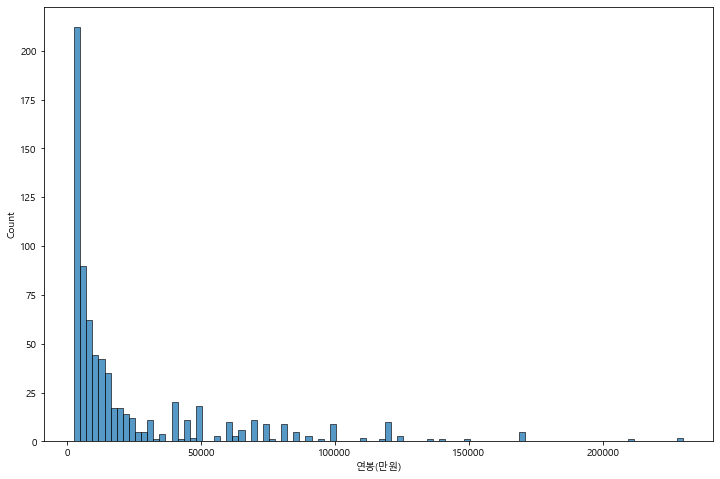

In [112]:
# 연봉 histogram
plt.figure(figsize=(12,8))
sns.histplot(baseball_df, x='연봉(만원)', bins=100)
plt.show()

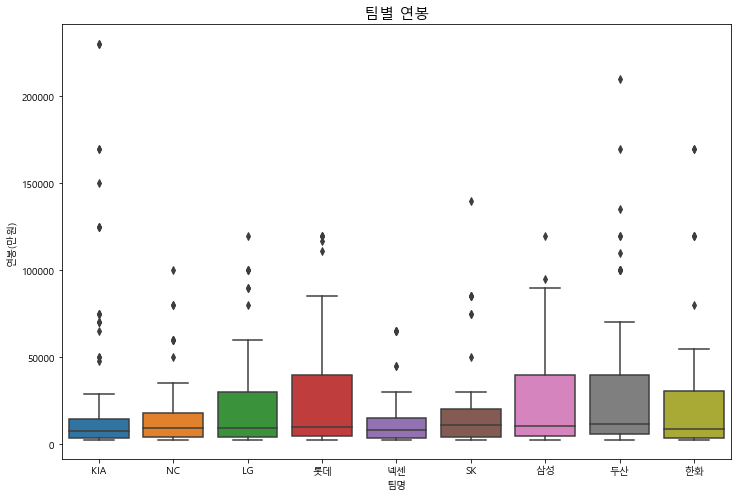

In [113]:
# 팀별 연봉 boxplot
plt.figure(figsize=(12,8))
sns.boxplot(data=baseball_df, y='연봉(만원)', x='팀명')
plt.title("팀별 연봉", fontsize=15)
plt.show()

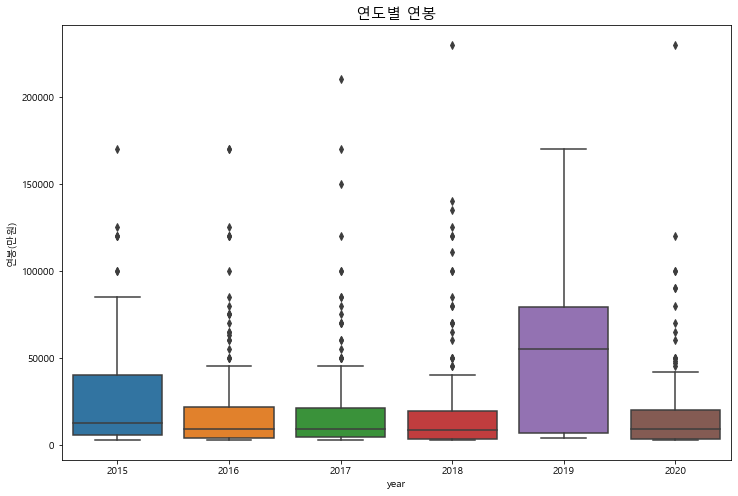

In [114]:
# 연도별 연봉
plt.figure(figsize=(12,8))
sns.boxplot(data=baseball_df, y='연봉(만원)', x='year')
plt.title("연도별 연봉", fontsize=15)
plt.show()

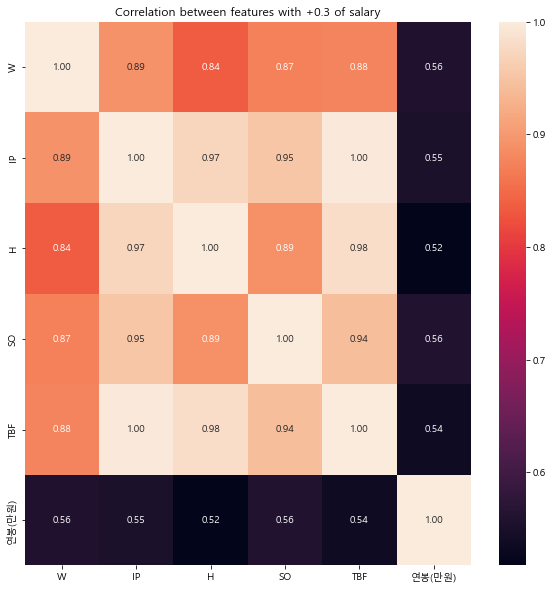

In [115]:
correlation_matrix = baseball_df.corr().round(2)
search = np.abs(correlation_matrix['연봉(만원)'])>0.5
corr_features = correlation_matrix.columns[search].tolist()

plt.figure(figsize=(10,10))
sns.heatmap(baseball_df[corr_features].corr(), annot=True, fmt=".2f")
plt.title("Correlation between features with +0.3 of salary")
plt.show()

- 인터넷 서핑을 해본 결과... 투수에게 가장 중요한 지표는 승률, 평균자책점, 피안타율, 이닝당 출루 허용률이라고 한다.
- 그러므로 해당 중요 지표와, 위의 correlation matrix에서 0.5 이상의 상관관계를 보여주고 있는 W, IP, H, SO, TBF까지만 적용 시키기로 한다.

### 2.1 필요한 컬럼으로만 데이터 정렬

In [121]:
# 필요 없는 컬럼 따로 빼내기
dropped = baseball_df[['G', 'L', 'SV', 'HLD', 'HR', 'BB', 'HBP', 'R', 'ER', 'CG', 'SHO']]

In [123]:
df = baseball_df[['연봉(만원)', 'W', 'IP', 'H', 'SO', 'TBF', 'ERA', 'WPCT', 'WHIP', 'AVG', '팀명']]

### 2.2 팀명 Label Encoding

In [125]:
# 팀명 label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['팀명'])

LabelEncoder()

In [126]:
le.classes_

array(['KIA', 'LG', 'NC', 'SK', '넥센', '두산', '롯데', '삼성', '한화'],
      dtype=object)

In [129]:
df['le_팀명'] = le.transform(df['팀명'])
df.head()

,연봉(만원),W,IP,H,SO,TBF,ERA,WPCT,WHIP,AVG,팀명,le_팀명
0,75000.0,15,184.0,150,157,756,2.44,0.714,1.24,0.232,KIA,0
1,60000.0,19,204.0,174,164,833,3.13,0.792,1.03,0.232,NC,2
2,40000.0,11,152.0,163,119,621,3.42,0.550,1.18,0.282,LG,1
3,120000.0,13,210.0,196,180,861,3.56,0.542,1.18,0.250,롯데,6
4,65000.0,15,196.0,190,193,825,3.62,0.652,1.31,0.257,넥센,4


In [130]:
df = df.drop('팀명', axis=1)

### 2.3 Outlier 검색

In [131]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors = 20, contamination = 'auto')
clf.fit_predict(df)
df_scores = clf.negative_outlier_factor_
df_scores = np.sort(df_scores)
df_scores[0:20]

array([-3.30554335, -3.30554121, -2.77957645, -2.52799685, -2.09080894,
       -2.02405904, -1.91248532, -1.88908682, -1.88908461, -1.88907039,
       -1.88622613, -1.88620744, -1.86536655, -1.83861563, -1.83094011,
       -1.83078648, -1.78664618, -1.75582316, -1.73473692, -1.73087422])

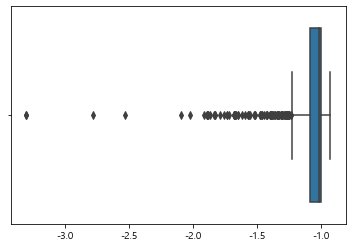

In [132]:
sns.boxplot(df_scores);

In [142]:
# -2.5 이후부터는 더 좁은 간격으로 줄어들기에, threshold를 4로 잡기로 한다.

threshold = np.sort(df_scores)[4]
threshold

-2.090808938823457

In [134]:
len(df)

720

In [143]:
df.loc[df_scores < threshold]

,연봉(만원),W,IP,H,SO,TBF,ERA,WPCT,WHIP,AVG,le_팀명
0,75000.0,15,184.0,150,157,756,2.44,0.714,1.24,0.232,0
1,60000.0,19,204.0,174,164,833,3.13,0.792,1.03,0.232,2
2,40000.0,11,152.0,163,119,621,3.42,0.550,1.18,0.282,1
3,120000.0,13,210.0,196,180,861,3.56,0.542,1.18,0.250,6


In [144]:
df = df.loc[df_scores >= threshold]

In [145]:
len(df)

716

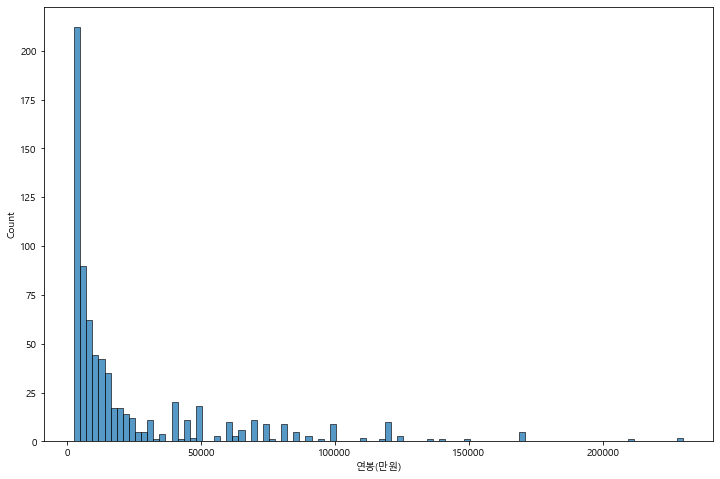

In [146]:
# 연봉 histogram
plt.figure(figsize=(12,8))
sns.histplot(baseball_df, x='연봉(만원)', bins=100)
plt.show()

In [147]:
df = df.reset_index(drop=True)

In [148]:
df.to_csv('./pre_scaling_raw.csv', encoding='utf-8-sig', index=False)

---

## 3. Pre_Processing

In [149]:
# 먼저 연봉과 팀은 standardisation columns 에서 제외하고 시작한다.

X_df = df.drop(['연봉(만원)', 'le_팀명'], axis = 1)
X_df.head()

,W,IP,H,SO,TBF,ERA,WPCT,WHIP,AVG
0,15,196.0,190,193,825,3.62,0.652,1.31,0.257
1,14,176.0,173,160,754,3.72,0.700,1.35,0.257
2,17,194.0,199,164,809,3.76,0.680,1.18,0.264
3,11,179.0,182,134,768,3.91,0.550,1.33,0.267
4,18,189.0,193,126,786,3.94,0.783,1.25,0.269


### 3.1 Standard Scaler

In [150]:
from sklearn.preprocessing import StandardScaler

scaled_cols = StandardScaler().fit_transform(X_df)

scaled_cols = pd.DataFrame(scaled_cols, columns = X_df.columns)
scaled_cols.head()

,W,IP,H,SO,TBF,ERA,WPCT,WHIP,AVG
0,2.591115,2.518498,2.190663,3.197744,2.426773,-0.718224,0.606120,-0.702212,-0.611262
1,2.355080,2.127516,1.872604,2.436610,2.099806,-0.680699,0.772504,-0.608084,-0.611262
2,3.063186,2.479400,2.359047,2.528868,2.353090,-0.665688,0.703177,-1.008127,-0.470928
3,1.646973,2.186164,2.040988,1.836928,2.164278,-0.609400,0.252554,-0.655148,-0.410784
4,3.299221,2.381654,2.246791,1.652410,2.247171,-0.598142,1.060210,-0.843404,-0.370689


In [152]:
team = pd.DataFrame(df['le_팀명'])
salary = pd.DataFrame(df['연봉(만원)'])

In [153]:
# 다시 합처주기

df = pd.concat([salary, scaled_cols, team], axis=1)
df.head()

,연봉(만원),W,IP,H,SO,TBF,ERA,WPCT,WHIP,AVG,le_팀명
0,65000.0,2.591115,2.518498,2.190663,3.197744,2.426773,-0.718224,0.606120,-0.702212,-0.611262,4
1,85000.0,2.355080,2.127516,1.872604,2.436610,2.099806,-0.680699,0.772504,-0.608084,-0.611262,3
2,80000.0,3.063186,2.479400,2.359047,2.528868,2.353090,-0.665688,0.703177,-1.008127,-0.470928,7
3,63000.0,1.646973,2.186164,2.040988,1.836928,2.164278,-0.609400,0.252554,-0.655148,-0.410784,6
4,40000.0,3.299221,2.381654,2.246791,1.652410,2.247171,-0.598142,1.060210,-0.843404,-0.370689,5


In [154]:
X = df.drop('연봉(만원)', axis=1)
y = df['연봉(만원)']

In [156]:
y.mean()

23010.754189944135

### 3.2 Test Data Split

In [155]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

---

## 4. Modelling

### 4.1 LinearRegression

In [159]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [160]:
from sklearn.linear_model import LinearRegression, LogisticRegression

linreg = LinearRegression()
model = linreg.fit(X_train, y_train)
y_pred_tr = model.predict(X_train)
y_pred_test = model.predict(X_test)
df_linref_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
df_linref_r2 = r2_score(y_test, y_pred_test)

print('Test RMSE : ', df_linref_rmse)
print("TEST R2 : ", df_linref_r2)

Test RMSE :  28729.130703756462
TEST R2 :  0.40612504290831086


### 4.2 LogisticRegression

In [161]:
logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
df_logref_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
df_logref_r2 = r2_score(y_test, y_pred_test)

print('Test RMSE : ', df_logref_rmse)
print("TEST R2 : ", df_logref_r2)

Test RMSE :  37791.809077276695
TEST R2 :  -0.02765042348011404


### 4.3 KNN

In [162]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn_model = knn.fit(X_train, y_train)
y_pred_test = knn_model.predict(X_test)
df_knn_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
df_knn_r2 = r2_score(y_test, y_pred_test)

print('Test RMSE : ', df_knn_rmse)
print("TEST R2 : ", df_knn_r2)

Test RMSE :  30588.703434074774
TEST R2 :  0.32675648381608535


### 4.4 Random Forrest

In [163]:
from sklearn.ensemble import RandomForestRegressor

for i in range(10, 150, 10):
    rf = RandomForestRegressor(n_estimators= i, random_state= 13)
    rf.fit(X_train, y_train)

    relation_square = rf.score(X_train, y_train)
    print('결정계수 : ', i, relation_square)

결정계수 :  10 0.8780890374092041
결정계수 :  20 0.8998724614681947
결정계수 :  30 0.9112963681067769
결정계수 :  40 0.9143277507458111
결정계수 :  50 0.9146716745546948
결정계수 :  60 0.9139748312076071
결정계수 :  70 0.9141079676106407
결정계수 :  80 0.9147380440316938
결정계수 :  90 0.9142030194099273
결정계수 :  100 0.9158562284852896
결정계수 :  110 0.9153096529525585
결정계수 :  120 0.9162886107198281
결정계수 :  130 0.9167795116790965
결정계수 :  140 0.9170896816248642


In [173]:
rf = RandomForestRegressor(n_estimators= 140, random_state= 13)
rf_model = rf.fit(X_train, y_train)
y_pred_test = rf_model.predict(X_test)
df_rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
df_rf_r2 = r2_score(y_test, y_pred_test)

print('Test RMSE : ', df_rf_rmse)
print("TEST R2 : ", df_rf_r2)

Test RMSE :  29474.450643838878
TEST R2 :  0.3749115413931762


### 4.5 GBM (Gradient Boosting)

In [174]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor()
gbm_model = gbm.fit(X_train, y_train)
y_pred_test = gbm_model.predict(X_test)
df_gbm_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
df_gbm_r2 = r2_score(y_test, y_pred_test)

print('Test RMSE : ', df_gbm_rmse)
print("TEST R2 : ", df_gbm_r2)

Test RMSE :  28580.7568760558
TEST R2 :  0.41224342928004143


### 4.6 XGBoost

In [175]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb_model = xgb.fit(X_train, y_train)
y_pred_test = xgb_model.predict(X_test)
df_xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
df_xgb_r2 = r2_score(y_test, y_pred_test)

print('Test RMSE : ', df_xgb_rmse)
print("TEST R2 : ", df_xgb_r2)

Test RMSE :  31766.43970809692
TEST R2 :  0.2739155634141144


### 4.7 LGBM

In [176]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)
y_pred_test = lgbm_model.predict(X_test)
df_lgbm_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
df_lgbm_r2 = r2_score(y_test, y_pred_test)

print('Test RMSE : ', df_lgbm_rmse)
print("TEST R2 : ", df_lgbm_r2)

Test RMSE :  29557.399041006156
TEST R2 :  0.371388283515223


### 4.8 Decision Tree

In [179]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree_model = tree.fit(X_train, y_train)
y_pred_test = tree_model.predict(X_test)
df_tree_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
df_tree_r2 = r2_score(y_test, y_pred_test)

print('Test RMSE : ', df_tree_rmse)
print("TEST R2 : ", df_tree_r2)

Test RMSE :  42669.15031833759
TEST R2 :  -0.3100203171569116


### 4.9 CatBoost

In [177]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor()
cat_model = cat.fit(X_train, y_train)
y_pred_test = cat_model.predict(X_test)
df_cat_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
df_cat_r2 = r2_score(y_test, y_pred_test)

print('Test RMSE : ', df_cat_rmse)
print("TEST R2 : ", df_cat_r2)

Learning rate set to 0.037484
0:	learn: 31224.7479471	total: 161ms	remaining: 2m 40s
1:	learn: 30831.9228334	total: 162ms	remaining: 1m 20s
2:	learn: 30416.7222907	total: 163ms	remaining: 54.2s
3:	learn: 30041.7175638	total: 165ms	remaining: 41.1s
4:	learn: 29704.6664626	total: 166ms	remaining: 33.1s
5:	learn: 29381.1525957	total: 168ms	remaining: 27.8s
6:	learn: 29047.0813944	total: 169ms	remaining: 24s
7:	learn: 28755.6271975	total: 171ms	remaining: 21.2s
8:	learn: 28478.5649871	total: 172ms	remaining: 18.9s
9:	learn: 28214.2519961	total: 174ms	remaining: 17.2s
10:	learn: 27974.4781217	total: 176ms	remaining: 15.8s
11:	learn: 27727.9041246	total: 178ms	remaining: 14.6s
12:	learn: 27498.1206181	total: 179ms	remaining: 13.6s
13:	learn: 27277.2287400	total: 181ms	remaining: 12.7s
14:	learn: 27041.5363378	total: 182ms	remaining: 11.9s
15:	learn: 26809.2237235	total: 183ms	remaining: 11.3s
16:	learn: 26614.1494585	total: 185ms	remaining: 10.7s
17:	learn: 26369.0779204	total: 186ms	remaini

### 3.9 RMSE & R2 for all models used

In [178]:
def compML(df, y, alg):
    model = alg().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    model_name = alg.__name__
    print(model_name, "RMSE : ", RMSE, "  , R2 : ", r2)

In [180]:
models = [LinearRegression, LogisticRegression, KNeighborsRegressor, DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor, XGBRegressor, LGBMRegressor]

In [181]:
for model in models:
    compML(df, '연봉(만원)', model)

LinearRegression RMSE :  28729.130703756462   , R2 :  0.40612504290831086
LogisticRegression RMSE :  37791.809077276695   , R2 :  -0.02765042348011404
KNeighborsRegressor RMSE :  30588.703434074774   , R2 :  0.32675648381608535
DecisionTreeRegressor RMSE :  42048.566496902655   , R2 :  -0.27219132822424896
RandomForestRegressor RMSE :  28997.712502334656   , R2 :  0.39496914764465674
GradientBoostingRegressor RMSE :  28736.05866273722   , R2 :  0.40583858541215523
XGBRegressor RMSE :  31766.43970809692   , R2 :  0.2739155634141144
LGBMRegressor RMSE :  29557.399041006156   , R2 :  0.371388283515223


---

## 4. Model Tuning

In [183]:
from sklearn.model_selection import GridSearchCV

### 4.1 KNN Model Tuning

In [184]:
knn_params = {"n_neighbors" : np.arange(2,30,1)}
knn_cv_model = GridSearchCV(knn_model, knn_params, cv=10).fit(X_train, y_train)
knn_cv_model.best_params_
knn_tuned = KNeighborsRegressor(**knn_cv_model.best_params_).fit(X_train, y_train)

y_pred = knn_tuned.predict(X_test)
df_knn_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_knn_tuned_r2 = r2_score(y_test, y_pred)

print('Test RMSE : ', df_knn_tuned_rmse)
print("TEST R2 : ", df_knn_tuned_r2)

Test RMSE :  29504.23050094239
TEST R2 :  0.373647772363925


### 4.2 Random Forests Model Tuning

In [185]:
rf_params = {"max_depth": [5,8,10,None],
            "max_features": [2,5,10,15,17],
            "n_estimators": [100,200, 500, 1000],
            "min_samples_split": [2,5,10,20,30]}
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)
rf_tuned = RandomForestRegressor(**rf_cv_model.best_params_).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
df_rf_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_rf_tuned_r2 = r2_score(y_test, y_pred)

print('Test RMSE : ', df_rf_tuned_rmse)
print("TEST R2 : ", df_rf_tuned_r2)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits
Test RMSE :  28982.68008416598
TEST R2 :  0.3955962812044018


### 4.3 GBM Model Tuning

In [186]:
gbm_params = {"learning_rate": [0.001,0.1,0.01, 0.05],
             "max_depth": [1,2,3,5,8,9,10],
             "n_estimators": [50,100,200,500,1000],
             "subsample": [2,1.5,1,0.4,0.5,0.7],
             "loss": ["ls","lad","quantile"]}                  
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)
gbm_tuned = GradientBoostingRegressor(**gbm_cv_model.best_params_).fit(X_train, y_train)                             
y_pred = gbm_tuned.predict(X_test)                             
df_gbm_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))                             
df_gbm_tuned_rmse  

Fitting 5 folds for each of 2520 candidates, totalling 12600 fits


29249.891931078393

In [187]:
df_gbm_tuned_r2 = r2_score(y_test, y_pred)

print('Test RMSE : ', df_gbm_tuned_rmse)
print("TEST R2 : ", df_gbm_tuned_r2)

Test RMSE :  29249.891931078393
TEST R2 :  0.3844000534847728


### 4.4 XGBoost Model Tuning

In [189]:
xgb_params = {"learning_rate": [0.1,0.01,0.5,0.7,0.8],
             "max_depth": [3,4,5,6,7,8],
             "n_estimators": [100,200,500,1000],
             "colsample_bytree": [0.5,0.7,0.8,0.9]}
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)
xgb_tuned = XGBRegressor(**xgb_cv_model.best_params_).fit(X_train, y_train)
y_pred = xgb_tuned.predict(X_test)
df_xgb_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_xgb_tuned_r2 = r2_score(y_test, y_pred)

print('Test RMSE : ', df_xgb_tuned_rmse)
print("TEST R2 : ", df_xgb_tuned_r2)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Test RMSE :  28411.643678047738
TEST R2 :  0.41917839780250765


### 4.5 LightGBM Model Tuning

In [188]:
lgbm_params = {"learning_rate": [0.01,0.001, 0.1, 0.5, 1],
              "n_estimators": [50,80,100,200,500,1000],
              "max_depth": [-1.5, -1.3, -1, 0.3, 0.5,0.7,2,4,6,7,10],
              "colsample_bytree": [0.1,0.3,0.5,0.7,1,1.3,1.5]}
lgbm_cv_model = GridSearchCV(lgbm_model, lgbm_params, cv = 10, n_jobs = -1, verbose =2).fit(X_train, y_train)
lgbm_tuned = LGBMRegressor(**lgbm_cv_model.best_params_).fit(X_train, y_train)                              
y_pred = lgbm_tuned.predict(X_test)                              
df_lgbm_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))                              
df_lgbm_tuned_r2 = r2_score(y_test, y_pred)

print('Test RMSE : ', df_lgbm_tuned_rmse)
print("TEST R2 : ", df_lgbm_tuned_r2)

Fitting 10 folds for each of 2310 candidates, totalling 23100 fits
Test RMSE :  29445.755901152945
TEST R2 :  0.37612805406462213


### 4.6 CatBoost Model Tuning

---

## 5. 다시 시도..

앞서서의 시도에서 성능이 좋지 않게 나왔기에, parameter를 조정하여 다시 시도해보기로 함.

### 5.1 데이터 스케일링

In [198]:
df_2 = pd.read_csv("./pre_scaling_raw.csv", encoding='utf-8-sig', thousands=',')

In [199]:
df_2.columns

Index(['연봉(만원)', 'W', 'IP', 'H', 'SO', 'TBF', 'ERA', 'WPCT', 'WHIP', 'AVG',
       'le_팀명'],
      dtype='object')

In [200]:
X2_df = df_2.drop(['연봉(만원)', 'le_팀명', 'ERA', 'WPCT', 'WHIP', 'AVG'], axis = 1)

In [201]:
scaled_cols_2 = StandardScaler().fit_transform(X2_df)
scaled_cols_2 = pd.DataFrame(scaled_cols_2, columns = X2_df.columns)

all_else = pd.DataFrame(df_2[['ERA', 'WPCT', 'WHIP', 'AVG','le_팀명']])
salary_2 = pd.DataFrame(df_2['연봉(만원)'])

df_2 = pd.concat([salary_2, scaled_cols_2, all_else], axis=1)

X_2 = df_2.drop('연봉(만원)', axis=1)
y_2 = df_2['연봉(만원)']

y_2.mean()

23010.754189944135

In [222]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y_2, test_size=0.2, random_state=13)

def compML_2(df, y, alg):
    model = alg().fit(X2_train, y2_train)
    y_pred2 = model.predict(X2_test)
    RMSE = np.sqrt(mean_squared_error(y2_test, y_pred2))
    r2 = r2_score(y2_test, y_pred2)
    
    model_name = alg.__name__
    print(model_name, "RMSE : ", RMSE, "  , R2 : ", r2)


for model in models:
    compML_2(df_2, '연봉(만원)', model)

LinearRegression RMSE :  28729.130703756462   , R2 :  0.40612504290831086
LogisticRegression RMSE :  38334.19111359119   , R2 :  -0.05735944516197078
KNeighborsRegressor RMSE :  30691.86786068547   , R2 :  0.32220762124921054
DecisionTreeRegressor RMSE :  40888.81434926781   , R2 :  -0.20298185504238253
RandomForestRegressor RMSE :  29674.021258665336   , R2 :  0.36641797343171
GradientBoostingRegressor RMSE :  28613.52538987218   , R2 :  0.4108949030417284
XGBRegressor RMSE :  31744.176240283952   , R2 :  0.2749329574291286
LGBMRegressor RMSE :  29420.63774014162   , R2 :  0.3771919650960234


여전히 R2의 가장 높은 값이 0.41이기에 마지막으로 다시 parameter조정을 하여 시도 함.

---

## 6. 다시2...

In [211]:
trial_3 = pd.read_csv('./df_try_2.csv', encoding='utf-8-sig', thousands=',')

In [213]:
trial_3.head()

,팀명,ERA,G,W,L,SV,HLD,WPCT,IP,H,...,SO,R,ER,WHIP,year,CG,SHO,TBF,AVG,연봉(만원)
0,KIA,2.44,32,15,6,0,1,0.714,184.0,150,...,157,52,50,1.24,2015,1,1,756,0.232,75000.0
1,NC,3.13,31,19,5,0,0,0.792,204.0,174,...,164,81,71,1.03,2015,1,0,833,0.232,60000.0
2,LG,3.42,25,11,9,0,0,0.550,152.0,163,...,119,64,58,1.18,2015,1,0,621,0.282,40000.0
3,롯데,3.56,32,13,11,0,0,0.542,210.0,196,...,180,86,83,1.18,2015,2,1,861,0.250,120000.0
4,넥센,3.62,32,15,8,0,0,0.652,196.0,190,...,193,92,79,1.31,2015,0,0,825,0.257,65000.0


In [214]:
for_scale = trial_3.drop(['연봉(만원)', '팀명', 'ERA', 'WPCT', 'WHIP', 'AVG', 'year'], axis=1)

In [215]:
all_else = trial_3[['연봉(만원)', '팀명', 'ERA', 'WPCT', 'WHIP', 'AVG', 'year']]

In [216]:
le = LabelEncoder()
le.fit(all_else['팀명'])
all_else['le_팀명'] = le.transform(all_else['팀명'])
all_else = all_else.drop('팀명', axis=1)

In [217]:
scaled_dropped = StandardScaler().fit_transform(for_scale)
scaled_dropped = pd.DataFrame(scaled_dropped, columns = for_scale.columns)

df_3 = pd.concat([all_else, scaled_dropped], axis=1)

X_3 = df_3.drop('연봉(만원)', axis=1)
y_3 = df_3['연봉(만원)']

y_3.mean()

23292.63888888889

In [220]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 'auto')
clf.fit_predict(df_3)
df_scores = clf.negative_outlier_factor_
df_scores = np.sort(df_scores)
df_scores[0:20]

array([-52.2878892 , -52.22652015, -52.01590378, -47.02057917,
       -46.85470133, -46.85442562, -46.81480008, -41.21549282,
       -35.58031667, -35.4144791 , -35.32098293, -31.59222047,
       -31.59210463, -30.77046028, -29.70789222, -26.57084524,
       -26.56101653, -26.50209857, -21.49519725, -21.35852765])

<AxesSubplot:>

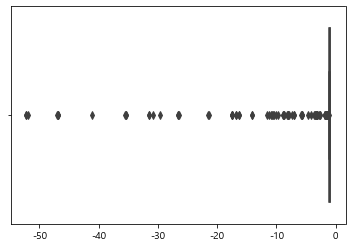

In [221]:
sns.boxplot(df_scores)

In [207]:
def compML_3(X, y, alg):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
    
    model = alg().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    model_name = alg.__name__
    print(model_name, "RMSE : ", RMSE, "  , R2 : ", r2)

In [219]:
for model in models:
    compML_3(X_3, y_3, model)

LinearRegression RMSE :  24983.552596258807   , R2 :  0.35175293077026404
LogisticRegression RMSE :  30575.073816573018   , R2 :  0.029116316554504085
KNeighborsRegressor RMSE :  26159.549615983666   , R2 :  0.2892895533728487
DecisionTreeRegressor RMSE :  29920.5336405174   , R2 :  0.07024003006418866
RandomForestRegressor RMSE :  23806.549822650348   , R2 :  0.41139344646936116
GradientBoostingRegressor RMSE :  25495.903891646518   , R2 :  0.32489239427063765
XGBRegressor RMSE :  25172.127158740543   , R2 :  0.3419301284639903
LGBMRegressor RMSE :  24823.27901598315   , R2 :  0.3600434747628455


- 모든 변수를 다 합치면, 성능이 오히려 떨어진다..

---

## 7. Prediction

- 모든 모델이 R2 0.4 정도밖에 되지 않아 prediction을 하기에는 적합해 보이지는 않는다.
- 그래도 그중에서 그나마 가장 높았던 두번째 try의 Gradient Boosting Regressor를 사용해서 연봉 예측을 해본다.

In [225]:
df_2 = pd.read_csv("./pre_scaling_raw.csv", encoding='utf-8-sig', thousands=',')
X2_df = df_2.drop(['연봉(만원)', 'le_팀명', 'ERA', 'WPCT', 'WHIP', 'AVG',], axis = 1)

scaled_cols_2 = StandardScaler().fit_transform(X2_df)
scaled_cols_2 = pd.DataFrame(scaled_cols_2, columns = X2_df.columns)

all_else = pd.DataFrame(df_2[['ERA', 'WPCT', 'WHIP', 'AVG','le_팀명']])
salary_2 = pd.DataFrame(df_2['연봉(만원)'])

df_2 = pd.concat([salary_2, scaled_cols_2, all_else], axis=1)

X_2 = df_2.drop('연봉(만원)', axis=1)
y_2 = df_2['연봉(만원)']

y_2.mean()

23010.754189944135

In [226]:
for model in models:
    compML_3(X_2, y_2, model)

LinearRegression RMSE :  28729.130703756462   , R2 :  0.40612504290831086
LogisticRegression RMSE :  38334.19111359119   , R2 :  -0.05735944516197078
KNeighborsRegressor RMSE :  30691.86786068547   , R2 :  0.32220762124921054
DecisionTreeRegressor RMSE :  37801.11697350284   , R2 :  -0.028156694106772795
RandomForestRegressor RMSE :  29601.831499620836   , R2 :  0.36949692916159904
GradientBoostingRegressor RMSE :  28368.747229290017   , R2 :  0.4209309451499902
XGBRegressor RMSE :  31744.176240283952   , R2 :  0.2749329574291286
LGBMRegressor RMSE :  29420.63774014162   , R2 :  0.3771919650960234


In [265]:
test = old_raw[old_raw['선수명'] == '최동원']
test = test.reset_index(drop=True)

In [258]:
test.head()

,순위,선수명,팀명,ERA,G,CG,SHO,W,L,SV,...,TBF,IP,H,HR,BB,HBP,SO,R,ER,year
0,11,최동원,롯데,2.89,38,16,1,9,16,4,...,863,208 2/3,202,17,51,8,148,89,67,1983
1,1,최동원,롯데,2.89,38,16,1,9,16,4,...,863,208 2/3,202,17,51,8,148,89,67,1983
2,3,최동원,롯데,2.40,51,14,1,27,13,6,...,1132,284 2/3,228,18,68,14,223,91,76,1984
3,1,최동원,롯데,1.92,42,14,4,20,9,8,...,865,225,170,7,41,8,161,60,48,1985
4,1,최동원,롯데,1.55,39,17,4,19,14,2,...,1039,267,204,7,55,6,208,60,46,1986


In [259]:
test.columns

Index(['순위', '선수명', '팀명', 'ERA', 'G', 'CG', 'SHO', 'W', 'L', 'SV', 'HLD',
       'WPCT', 'TBF', 'IP', 'H', 'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'year'],
      dtype='object')

In [260]:
le.classes_

array(['KIA', 'LG', 'NC', 'SK', '넥센', '두산', '롯데', '삼성', '한화'],
      dtype=object)

In [244]:
X_train.head()

,W,IP,H,SO,TBF,ERA,WPCT,WHIP,AVG,le_팀명
2,3.063186,2.479400,2.359047,2.528868,2.353090,-0.665688,0.703177,-1.008127,-0.470928,7
458,-0.713381,-1.117627,-1.158306,-1.046157,-1.183684,-1.127255,1.812404,-1.361106,-0.250402,6
71,-0.713381,-0.609352,-0.540898,-0.976963,-0.626458,-0.294184,0.079237,0.003747,0.631702,8
375,-0.477345,-0.609352,-0.391223,-0.769381,-0.529750,0.899134,-0.787347,1.062685,1.193041,0
304,0.702832,0.426748,0.301021,0.429982,0.391286,-0.785771,1.042878,-0.584552,-0.490976,5


In [266]:
for idx, row in test.iterrows():
    value = dropInning(row['IP'])
    test.loc[idx, 'IP'] = value

In [267]:
test['le_팀명'] = 6
test['AVG'] = ((test['H'].astype(float)) + (test['HR'].astype(float)))/(test['TBF'].astype(float))
test['WHIP'] = ((test['H'].astype(float)) + (test['BB'].astype(float)))/(test['IP'].astype(float))
test = test.drop(['순위', '팀명', '선수명', 'G', 'CG', 'SHO', 'L', 'SV', 'HLD', 'HR' ,'R', 'BB', 'HBP', 'ER', 'year'], axis=1)

In [268]:
test = test.astype(float)

In [270]:
X_train.head()

,W,IP,H,SO,TBF,ERA,WPCT,WHIP,AVG,le_팀명
2,3.063186,2.479400,2.359047,2.528868,2.353090,3.76,0.680,1.18,0.264,7
458,-0.713381,-1.117627,-1.158306,-1.046157,-1.183684,2.53,1.000,1.03,0.275,6
71,-0.713381,-0.609352,-0.540898,-0.976963,-0.626458,4.75,0.500,1.61,0.319,8
375,-0.477345,-0.609352,-0.391223,-0.769381,-0.529750,7.93,0.250,2.06,0.347,0
304,0.702832,0.426748,0.301021,0.429982,0.391286,3.44,0.778,1.36,0.263,5


In [269]:
test.head()

,ERA,W,WPCT,TBF,IP,H,SO,le_팀명,AVG,WHIP
0,2.89,9.0,0.360,863.0,208.0,202.0,148.0,6.0,0.253766,1.216346
1,2.89,9.0,0.360,863.0,208.0,202.0,148.0,6.0,0.253766,1.216346
2,2.40,27.0,0.675,1132.0,284.0,228.0,223.0,6.0,0.217314,1.042254
3,1.92,20.0,0.690,865.0,225.0,170.0,161.0,6.0,0.204624,0.937778
4,1.55,19.0,0.576,1039.0,267.0,204.0,208.0,6.0,0.203080,0.970037


In [271]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=13)
    
gbm = GradientBoostingRegressor()
gbm_model = gbm.fit(X_train, y_train)

y_pred_test = gbm_model.predict(test)
print(y_pred_test)

[128110.12998839 128110.12998839 123867.56947722 122615.67179549
 124569.27640385 126449.74230442 123049.64169306]


In [273]:
round(y_pred_test.mean(),2)

125253.17

예측한 값으로는 12억 5천으로 보인다.

In [274]:
y_train

2      80000.0
458     2700.0
71      5100.0
375    12000.0
304     6200.0
        ...   
153     2700.0
528     9000.0
74      3800.0
176    63000.0
338     2900.0
Name: 연봉(만원), Length: 572, dtype: float64